### Import the necessary libraries

In [12]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load the dataset and preprocess the images

In [9]:
path = "mydataset"

image_size = (32, 32)

images = []
classNo = []

myList = os.listdir(path)
print("Total No of classes Detected ",len(myList))
noOfClasses = len(myList)

Total No of classes Detected  124


In [10]:
for x in range (0,noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(x)+"/"+y)
        curImg = cv2.resize(curImg,image_size)
        curImg = curImg/255.0 # Normalize the image
        images.append(curImg)
        classNo.append(x)
    #print(x,end=" ")
print(" ")

images = np.array(images)
classNo = np.array(classNo)

print(images.shape)

 
(20628, 32, 32, 3)


### Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(16502, 32, 32, 3)
(4126, 32, 32, 3)


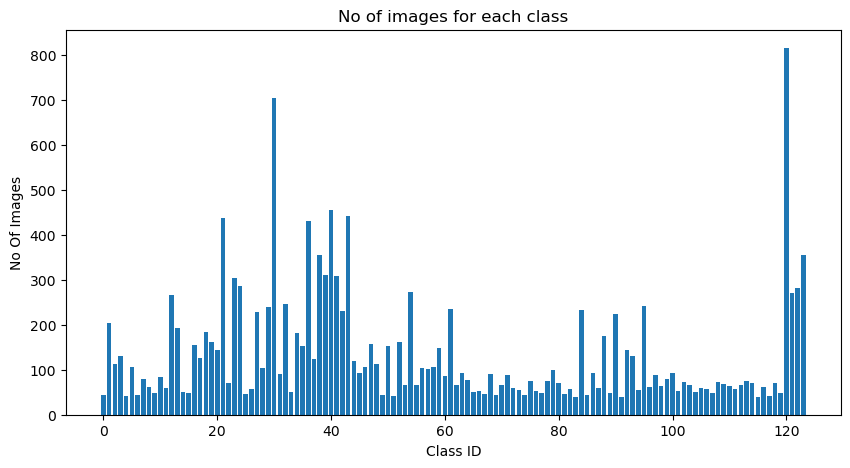

(32, 32, 3)


In [5]:
numOfSamples = []
for x in range(0,noOfClasses):
    numOfSamples.append(len(np.where(y_train==x)[0]))
#print(numOfSamples)

plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("No of images for each class")
plt.xlabel("Class ID")
plt.ylabel("No Of Images")
plt.show()
print(X_train[30].shape)

In [6]:
def preProcessing(img):
    img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.equalizeHist(img)
    img = img/255
    return img

#img = preProcessing(X_train[30])
#img = cv2.resize(img,(300,300))
#cv2.imshow("PreProcessed",img)
#cv2.waitKey(0)

X_train = np.array(list(map(preProcessing,X_train)))
X_test = np.array(list(map(preProcessing,X_test)))

In [7]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

### Define the CNN model architecture

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(os.listdir(path)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the CNN model

In [14]:
model.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=10, batch_size=32, validation_data=(np.expand_dims(X_test, axis=-1), y_test))

Epoch 1/10
516/516 [==============================] - 10s 17ms/step - loss: 3.7011 - accuracy: 0.2032 - val_loss: 2.2713 - val_accuracy: 0.4476
Epoch 2/10
516/516 [==============================] - 8s 15ms/step - loss: 1.5921 - accuracy: 0.5913 - val_loss: 1.3936 - val_accuracy: 0.6379
Epoch 3/10
516/516 [==============================] - 8s 15ms/step - loss: 1.0419 - accuracy: 0.7243 - val_loss: 1.1089 - val_accuracy: 0.7075
Epoch 4/10
516/516 [==============================] - 8s 16ms/step - loss: 0.8061 - accuracy: 0.7820 - val_loss: 0.9909 - val_accuracy: 0.7472
Epoch 5/10
516/516 [==============================] - 8s 15ms/step - loss: 0.6681 - accuracy: 0.8189 - val_loss: 0.9471 - val_accuracy: 0.7555
Epoch 6/10
516/516 [==============================] - 9s 17ms/step - loss: 0.5635 - accuracy: 0.8428 - val_loss: 0.9157 - val_accuracy: 0.7690
Epoch 7/10
516/516 [==============================] - 8s 15ms/step - loss: 0.4780 - accuracy: 0.8673 - val_loss: 0.9158 - val_accuracy: 0.775

### Evaluate the model on the test set

In [15]:
test_loss, test_accuracy = model.evaluate(np.expand_dims(X_test, axis=-1), y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

129/129 [==============================] - 1s 8ms/step - loss: 0.9567 - accuracy: 0.7785
Test Loss: 0.9566500782966614
Test Accuracy: 0.7784779667854309


### Make predictions on the test set

In [17]:
y_pred_prob = model.predict(np.expand_dims(X_test, axis=-1))
y_pred = np.argmax(y_pred_prob, axis=1)

129/129 [==============================] - 1s 5ms/step


### Print classification report and confusion matrix

In [18]:
target_names = [str(label) for label in np.unique(y_test)]
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.73      0.78      0.75        41
           2       1.00      0.75      0.86        28
           3       0.74      0.96      0.84        27
           4       0.80      0.36      0.50        11
           5       0.81      0.74      0.77        23
           6       0.56      0.62      0.59         8
           7       0.62      0.87      0.72        15
           8       0.88      0.70      0.78        10
           9       0.76      1.00      0.87        13
          10       0.86      0.55      0.67        22
          11       0.60      0.82      0.69        11
          12       0.78      0.86      0.82        57
          13       0.90      0.95      0.92        38
          14       0.67      1.00      0.80         6
          15       0.75      0.60      0.67         5
          16       0.67      0.86      0.76        36
    